__Objective:__ To analyze motor vehicle sales data in Colorado to identify trends, forecast
future sales, and understand the factors influencing sales.

__Description__
This dataset contains information on motor vehicle sales in various counties across
Colorado, segmented by year and quarter. The data is useful for analyzing trends in
vehicle sales, understanding the economic impact of automotive transactions, and
making informed decisions in related business or policy planning.

__Columns__
* Year: The calendar year in which the sales data was recorded.
* Quarter: The quarter of the year during which the sales were made. The quarters
are divided as follows:

        ○ Q1: January to March
        ○ Q2: April to June
        ○ Q3: July to September
        ○ Q4: October to December
  
* County: The name of the county in Colorado where the sales were recorded.
* Sales: The total dollar amount of motor vehicle sales in the specified coun

In [2]:
# import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [3]:
pd.options.display.float_format='{:.2f}'.format

df = pd.read_csv('colorado_motor_vehicle_sales.csv')
df.head()

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000


## Exploratory Data Analysis

In [4]:
# Dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     501 non-null    int64 
 1   quarter  501 non-null    int64 
 2   county   501 non-null    object
 3   sales    501 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [5]:
# Summary statistics
df.describe(include='all')

,year,quarter,county,sales
count,501.00,501.00,501,501.00
unique,NaN,NaN,17,NaN
top,NaN,NaN,Adams,NaN
freq,NaN,NaN,32,NaN
mean,2011.57,2.50,NaN,176058483.03
std,2.27,1.12,NaN,164205510.08
min,2008.00,1.00,NaN,6274000.00
25%,2010.00,2.00,NaN,61482000.00
50%,2012.00,3.00,NaN,138582000.00
75%,2014.00,4.00,NaN,224158000.00


In [6]:
# total number of duplicate rows
df.duplicated().sum()

0

In [70]:
categorical_data = ['year', 'quarter', 'county']
for i in categorical_data:
    print(f'Number of unique values in {i} column is {df[i].nunique()}')
    print(df[i].unique())
    print()

Number of unique values in year column is 8
[2008 2009 2010 2011 2012 2013 2014 2015]

Number of unique values in quarter column is 4
[1 2 3 4]

Number of unique values in county column is 17
['Adams' 'Arapahoe' 'Boulder/Broomfield' 'Denver' 'Douglas' 'El Paso'
 'Fremont' 'Garfield' 'Jefferson' 'La Plata' 'Larimer' 'Mesa' 'Pueblo'
 'Weld' 'Boulder' 'Broomfield' 'Rest of State']



In [71]:
print('Maximum sales:')
df[df.sales==df.sales.max()]

Maximum sales:


,year,quarter,county,sales
470,2015,3,Arapahoe,916910000


* The most significant motor vehicle sales event occurred in the third quarter of 2015 in Arapahoe County.

In [72]:
print('Minmum sales:')
df[df.sales==df.sales.min()]

Minmum sales:


,year,quarter,county,sales
63,2009,1,Fremont,6274000


* The weakest sales event in the dataset happened in the first quarter of 2009 in Fremont County

In [73]:
print('Counties with Average Sales Above the Overall Average Sales')
data = df.groupby(by='county')['sales'].mean().reset_index().sort_values(by='sales', ascending =False)
data[data.sales>df.sales.mean()].rename(columns={'sales':'Avg Sales'})

Counties with Average Sales Above the Overall Average Sales


,county,Avg Sales
1,Arapahoe,629447593.75
7,El Paso,372688875.00
10,Jefferson,283075218.75
0,Adams,278191093.75
5,Denver,211362906.25


* The counties listed have average motor vehicle sales that are above the overall average sales for all counties.
* Arapahoe has the highest average sales at approximately 629.4 million dollar. 
* El Paso follows with around $372.7 million in average sales.
* Other counties with above-average sales include Jefferson, Adams, and Denver.
  
This indicates that these counties, on average, have higher motor vehicle sales, which could point to larger populations, more economic activity, or stronger demand for vehicles in these areas compared to others in the dataset.

In [74]:
print('Counties with Average Sales Below the Overall Average Sales')
data = df.groupby(by='county')['sales'].mean().reset_index().sort_values(by='sales')
data[data.sales<df.sales.mean()].rename(columns={'sales':'Avg Sales'})

Counties with Average Sales Below the Overall Average Sales


,county,Avg Sales
8,Fremont,9904343.75
11,La Plata,24775218.75
4,Broomfield,36690214.29
9,Garfield,50018562.50
14,Pueblo,74501375.00
13,Mesa,81919875.00
6,Douglas,101140406.25
15,Rest of State,143286800.00
16,Weld,158965281.25
12,Larimer,167011468.75


* These counties have average motor vehicle sales that are below the overall average for the dataset.
* The lowest average sales are from Fremont, with approximately $9.9 million in average sales.
* Other counties with below-average sales include La Plata, Broomfield, Garfield, and Pueblo, with their average sales ranging from a few million to tens of millions of dollars.
  
This suggests that these counties, on average, have lower motor vehicle sales, which could be due to smaller populations, less economic activity, or lower demand for vehicles compared to the counties with above-average sales.

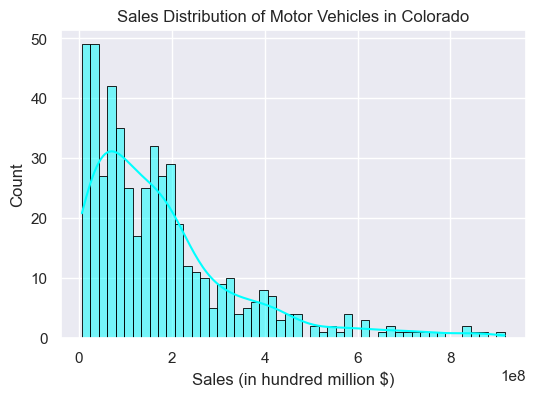

In [75]:
plt.figure(figsize=(6, 4))

sns.histplot(df['sales'], kde = True, bins = 50, color = 'cyan', edgecolor = 'black')
plt.title('Sales Distribution of Motor Vehicles in Colorado')
plt.xlabel('Sales (in hundred million $)')
plt.show()

The right-skewed distribution indicates that most counties have relatively low vehicle sales, with a few counties (likely more urban or economically active) having much higher sales. This creates a long tail on the right side, suggesting that high sales outliers are influencing the overall average.

In [76]:
agg = df.groupby(by='quarter')['sales'].sum().reset_index()
agg

,quarter,sales
0,1,20376846000
1,2,22343294000
2,3,23914934000
3,4,21570226000


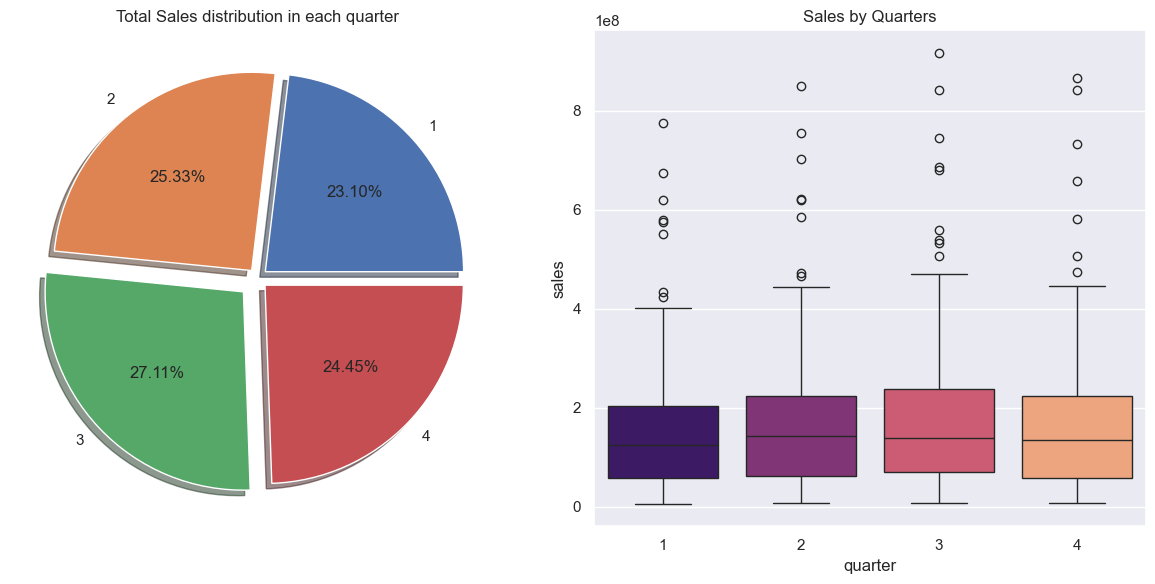

In [77]:
agg = df.groupby(by='quarter')['sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.pie(agg['sales'], labels= agg['quarter'], autopct='%0.2f%%', shadow=True, explode=[0.05, 0.05, 0.1, 0.05])
plt.title('Total Sales distribution in each quarter')


plt.subplot(1,2,2)
sns.boxplot(data=df, x='quarter', y='sales', palette='magma')
plt.title('Sales by Quarters')
plt.tight_layout()
plt.show()

* Q3 appears to be the peak period for vehicle sales in this dataset, potentially due to factors like seasonal demand or economic conditions.
* Q1 typically sees the least sales, possibly due to post-holiday slowdowns or other seasonal factors that affect vehicle purchases.

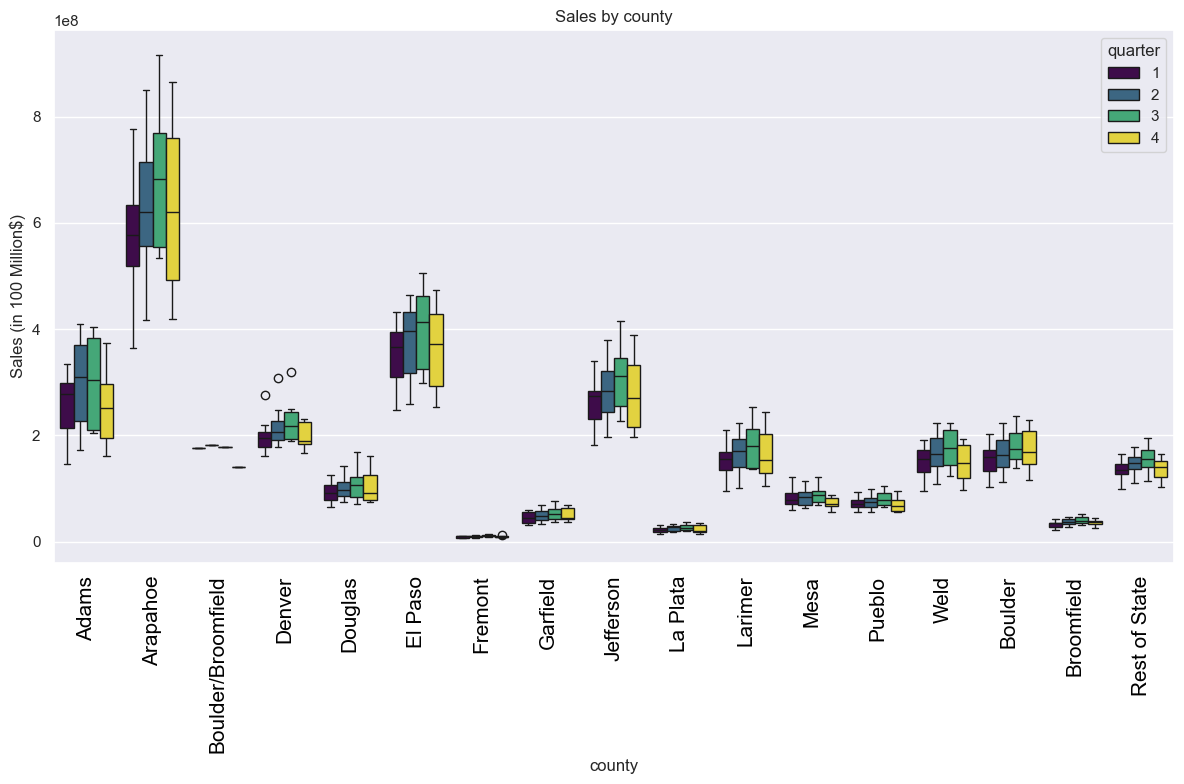

In [78]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='county', y='sales', hue= 'quarter', palette='viridis')
plt.title('Sales by county')
plt.ylabel('Sales (in 100 Million$)')
plt.xticks(color='black', fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


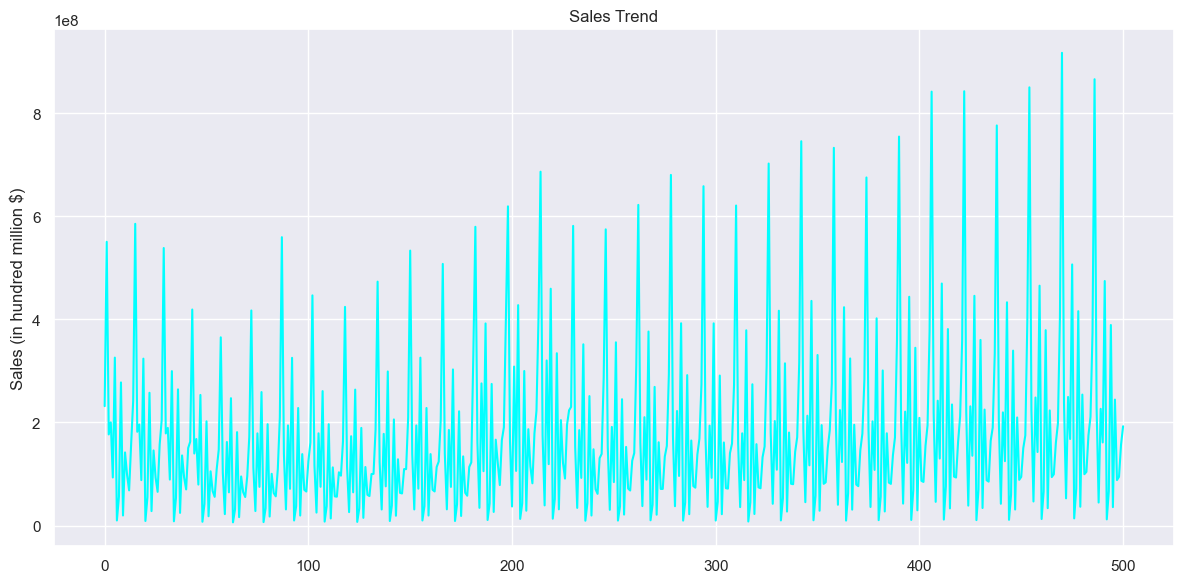

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(df['sales'], color = 'cyan')
plt.ylabel('Sales (in hundred million $)')
plt.title('Sales Trend')
plt.tight_layout()
plt.show()

In [80]:
df.groupby(by='county').agg({'sales': [ 'count', 'sum', 'mean', 'max', 'min']})

sales                                                
                   count          sum         mean        max        min
county                                                                  
Adams                 32   8902115000 278191093.75  410532000  147150000
Arapahoe              32  20142323000 629447593.75  916910000  365064000
Boulder               28   4742532000 169376142.86  237226000  103053000
Boulder/Broomfield     4    677201000 169300250.00  181959000  139785000
Broomfield            28   1027326000  36690214.29   52778000   22194000
Denver                32   6763613000 211362906.25  320173000  162119000
Douglas               32   3236493000 101140406.25  167915000   64458000
El Paso               32  11926044000 372688875.00  506447000  247017000
Fremont               32    316939000   9904343.75   13905000    6274000
Garfield              32   1600594000  50018562.50   76284000   31249000
Jefferson             32   9058407000 283075218.75  415789000  181200000
La Plata              32    792807000  24775218.75   36524000   13793000
Larimer               32   5344367000 167011468.75  254019000   95235000
Mesa                  32   2621436000  81919875.00  122092000   56587000
Pueblo                32   2384044000  74501375.00  104210000   55351000
Rest of State         25   3582170000 143286800.00  195498000   99930000
Weld                  32   5086889000 158965281.25  223527000   95791000

__Insights:__
1. Total Sales (Sum):

* Arapahoe has the highest total sales, with over \$20.14 billion in motor vehicle sales, reflecting its large population or economic activity.
* Fremont has the lowest total sales, with just \$316.94 million, which might indicate fewer vehicle transactions or a smaller population.
  
2. Average Sales (Mean):

* Arapahoe also has the highest average sales per entry (\$629.45 million), suggesting a high volume of sales or large transactions in that county.
* Broomfield has the lowest average sales (\$36.69 million), possibly reflecting a smaller market or fewer high-value sales.

3. Max Sales (Max):

* Arapahoe leads again with the highest single recorded sale (\$916.91 million), pointing to a particularly large vehicle transaction in that county.
* Fremont has the smallest recorded sale at \$13.91 million, which is considerably lower than other counties, possibly due to smaller or fewer sales.

4. Min Sales (Min):

* Fremont has the lowest minimum recorded sale (\$6.27 million), indicating that even its smallest sales transactions are still relatively large compared to other counties.
* Broomfield has the smallest recorded minimum sale (\$22.19 million), which could mean that even its smallest transactions are still significant.

__Other Key Takeaways:__
* Rest of State: This group, which likely aggregates multiple smaller or rural counties, has a total sales of \$3.58 billion, with an average sale of \$143.29 million. This suggests that the "Rest of State" counties collectively contribute a fair amount to the overall sales, but individually, their sales might be more spread out.
* Count Consistency: Most counties have 32 entries, indicating that they are fairly consistent in terms of data reporting across quarters. However, Boulder/Broomfield has only 4 entries, which may suggest limited data or special reporting for this combined entity.

## Statistical Time Analysis

In [81]:
# import necessary libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


<Figure size 2000x1000 with 0 Axes>

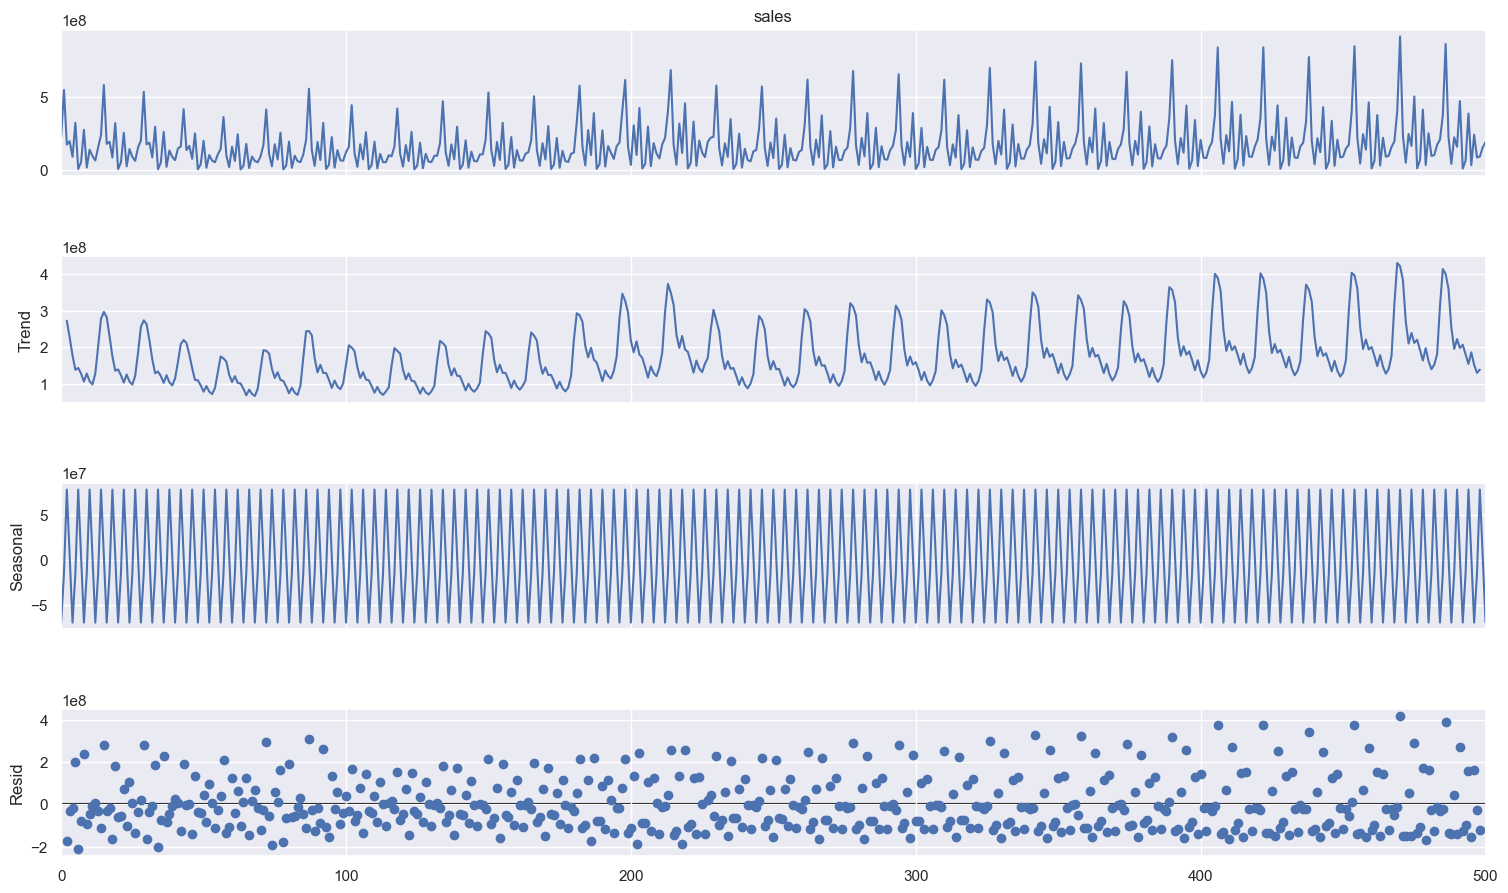

In [82]:

result = seasonal_decompose(df.sales, period = 4)
fig = plt.figure(figsize = (20, 10))
fig = result.plot()
fig.set_size_inches(17, 10)


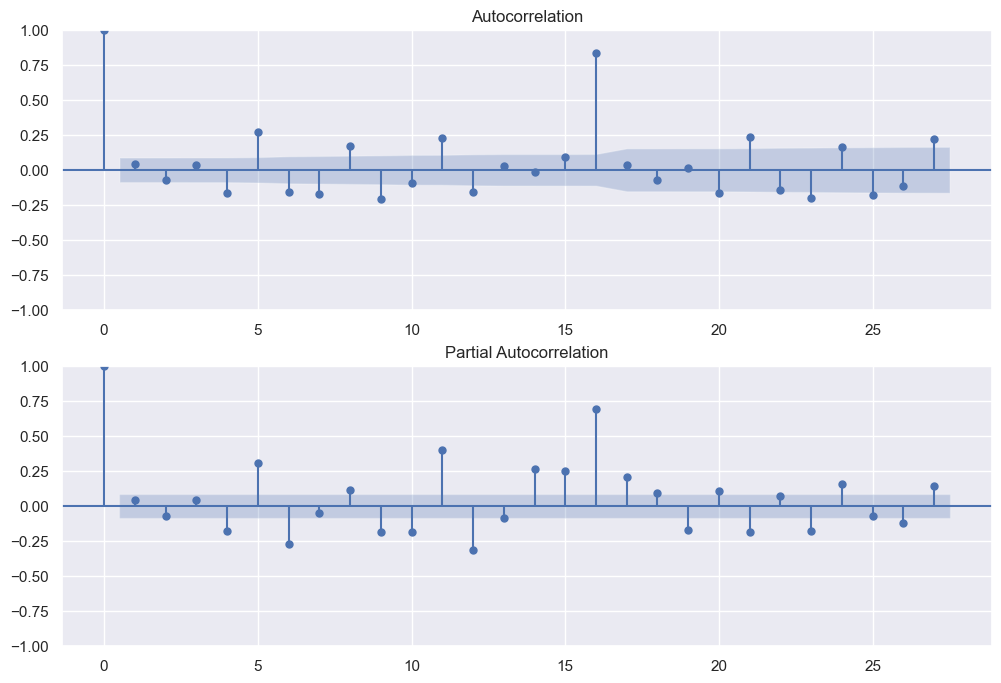

In [83]:

fig, axes = plt.subplots(2, 1, figsize = (12, 8))
plot_acf(df['sales'], ax = axes[0])
plot_pacf(df['sales'], ax = axes[1])
plt.show()


In [84]:

# The Augmented Dickey-Fuller (ADF) test performed to check the stationarity of the sales data

adft = adfuller(df["sales"])

if adft[1] <= 0.05:
    print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
print()
print(pd.Series(adft[0:4], index = ["test_statistics", "p-value", 'lag', 'no of data points']))

Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

test_statistics      -0.76
p-value               0.83
lag                  18.00
no of data points   482.00
dtype: float64


* The sales data shows trends or patterns that change over time, and it doesn't have a constant mean or variance. To proceed with time series forecasting, we would typically need to transform the data (e.g., by differencing) to make it stationary which ARIMA and SARIMA can handle this automatically.

In [7]:
# this code prepares the dataset for time series analysis by converting the year and quarter columns 
# into a datetime index at the start of each quarter.
df['Date'] = df['year'].astype(str) + 'Q' + df['quarter'].astype(str)
df['Date'] = pd.PeriodIndex(df['Date'], freq='Q').to_timestamp()
df.set_index('Date', inplace = True)


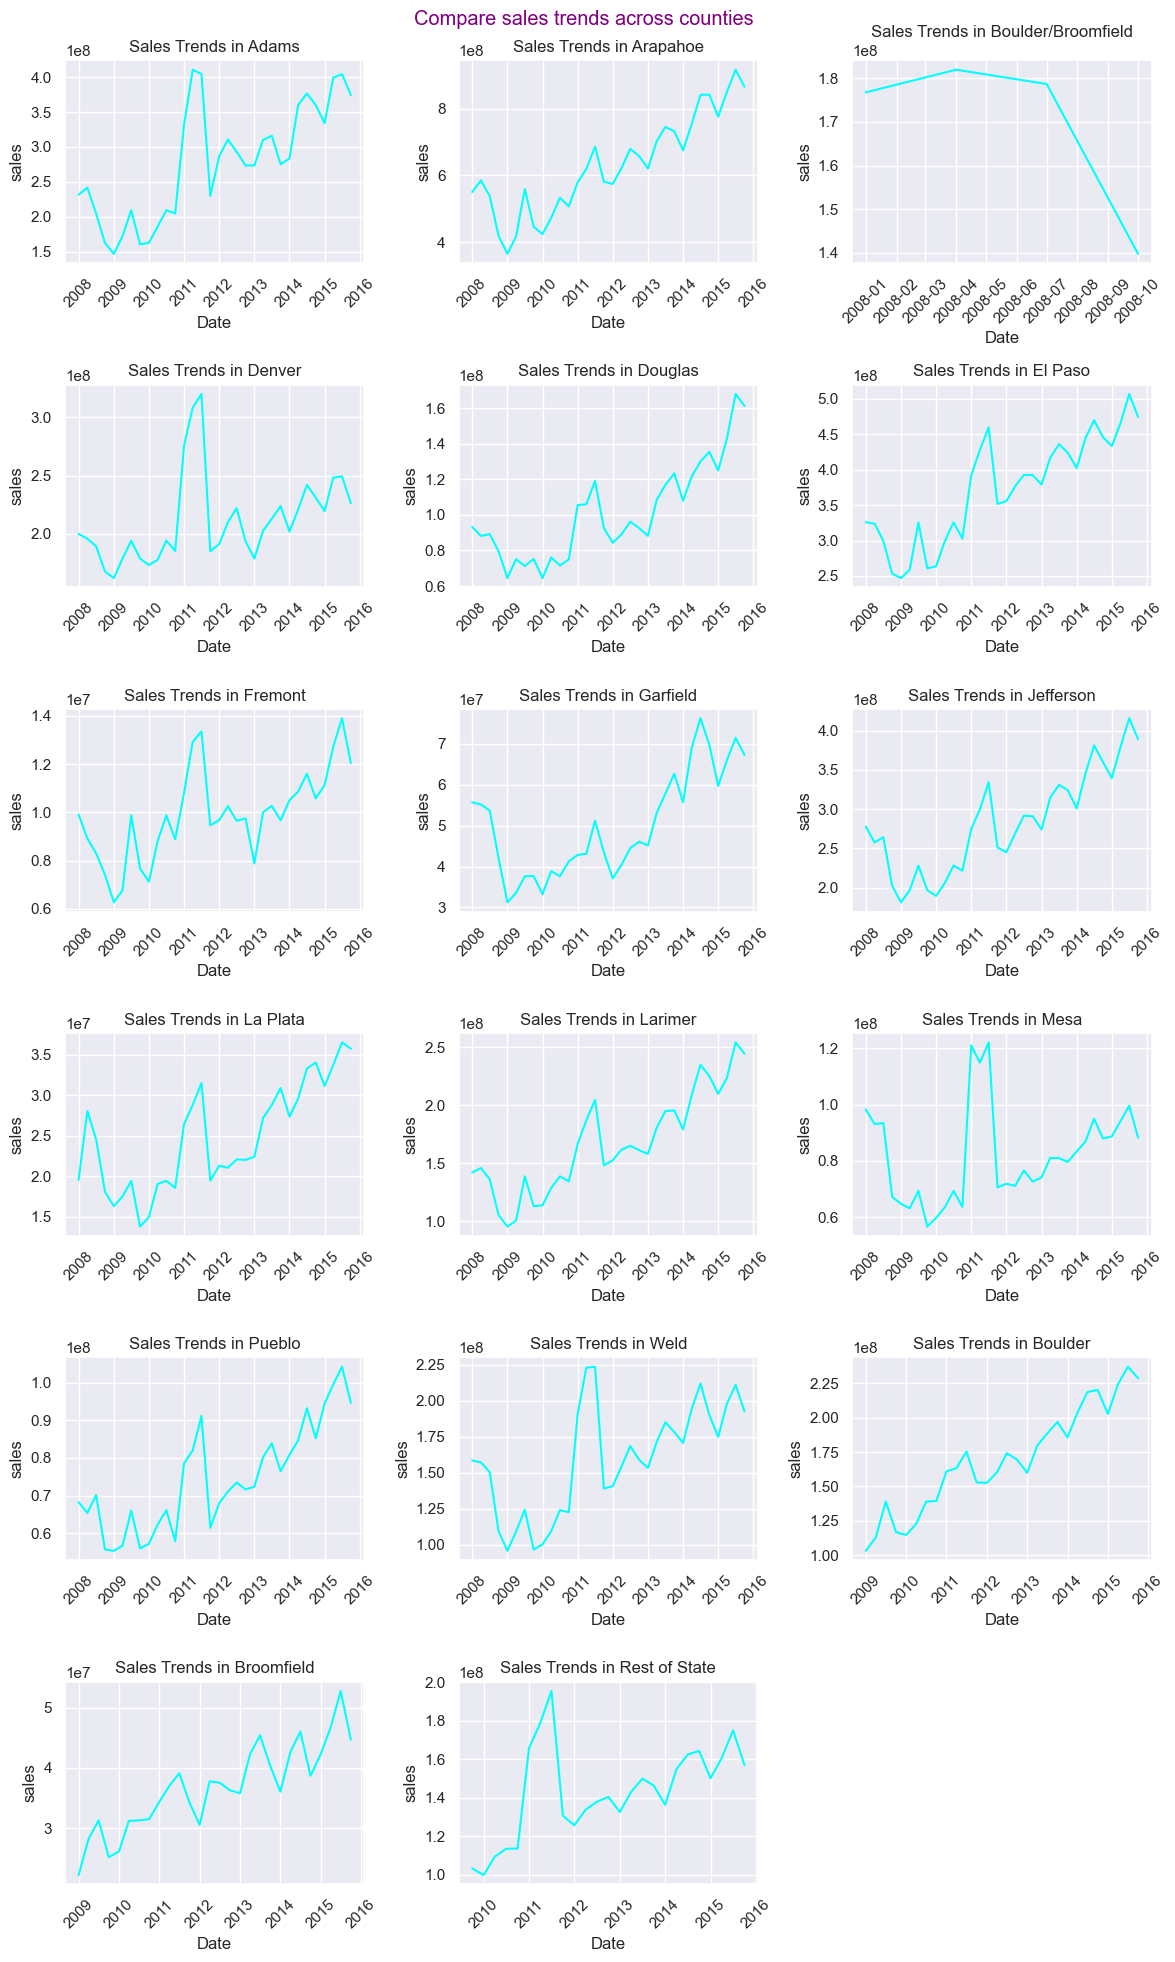

In [86]:

counties = df['county'].unique()

plt.figure(figsize=(12, 20))
pt = 1

for county in counties:
    county_data = df[df['county'] == county].sort_values(by='Date')
    
    plt.subplot(6, 3, pt)
    sns.lineplot(x = county_data.index, y = county_data['sales'], color = 'cyan')
    plt.title(f'Sales Trends in {county}')
    plt.xticks(rotation=45)
    pt+=1
    
plt.suptitle('Compare sales trends across counties', color='purple')    
plt.tight_layout()
plt.show()

## Train/Test Split

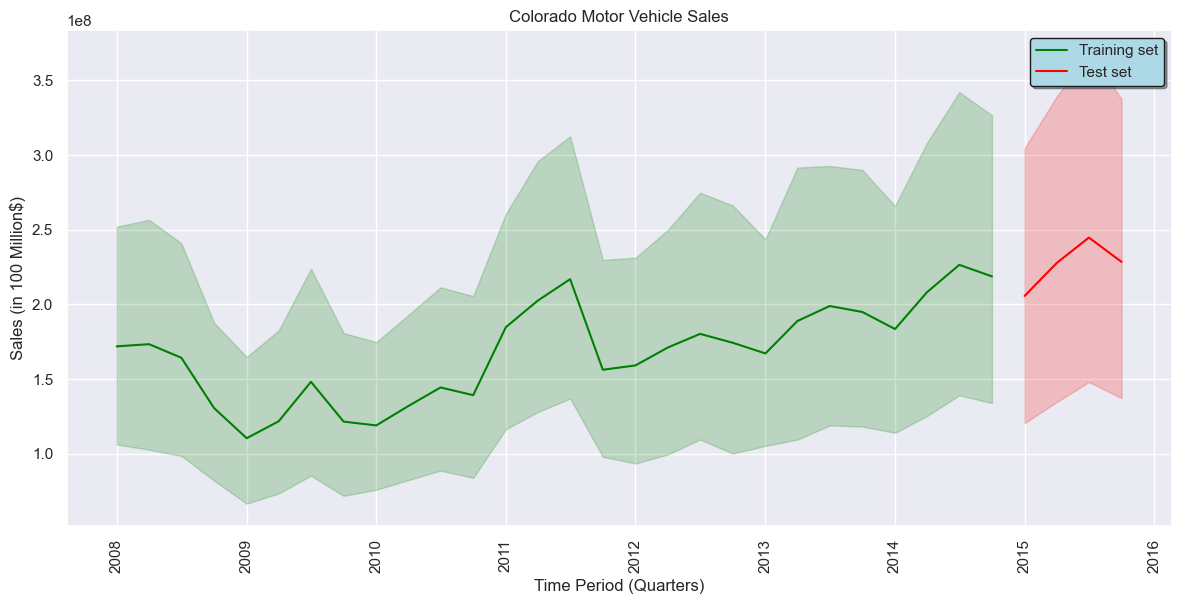

In [8]:

train_data = df.loc[df.index < '01-01-2015'] #for training the model.
test_data = df.loc[df.index >= '01-01-2015'] #to evaluate the model's performance after it has been trained.

plt.figure(figsize=(12, 6))
sns.lineplot(x = train_data.index, y = train_data['sales'], color = 'green', label = 'Training set')
sns.lineplot(x = test_data.index, y = test_data['sales'], color = 'red', label = 'Test set')
plt.title('Colorado Motor Vehicle Sales')
plt.xlabel('Time Period (Quarters)')
plt.ylabel('Sales (in 100 Million$)')
plt.legend(shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


## Modeling

In [10]:
# import necessary libraries
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


* p (AR order): This represents the number of lag observations included in the model, i.e., the number of previous time steps that are used to predict the next value.
* d (Differencing): This is the number of times the data is differenced to make it stationary, essentially removing trends from the data.
* q (MA order): This represents the size of the moving average window, i.e., the number of lagged forecast errors that are included in the model.

In [89]:
# performing hyperparameter tuning
# we can treat p, d, q as hyperparamerter
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)

def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

def evaluate_models(dataset, test, p_values, d_values, q_values):
    if isinstance(dataset, pd.DataFrame):
        dataset = dataset['sales']
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset,test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

evaluate_models(train_data['sales'], test_data['sales'], p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=214849497.775
ARIMA(0, 0, 1) RMSE=214527977.157
ARIMA(0, 0, 2) RMSE=212308967.149
ARIMA(0, 1, 0) RMSE=288651180.846
ARIMA(0, 1, 1) RMSE=210522062.563
ARIMA(0, 1, 2) RMSE=210660487.439
ARIMA(0, 2, 0) RMSE=482813235.363
ARIMA(0, 2, 1) RMSE=289108565.206
ARIMA(0, 2, 2) RMSE=211247072.272
ARIMA(1, 0, 0) RMSE=214583133.658
ARIMA(1, 0, 1) RMSE=206921065.944
ARIMA(1, 0, 2) RMSE=206622146.342
ARIMA(1, 1, 0) RMSE=265791387.499
ARIMA(1, 1, 1) RMSE=210636688.905
ARIMA(1, 1, 2) RMSE=203550755.791
ARIMA(1, 2, 0) RMSE=392810620.365
ARIMA(1, 2, 1) RMSE=266277932.972
ARIMA(1, 2, 2) RMSE=211042548.094
ARIMA(2, 0, 0) RMSE=213788558.221
ARIMA(2, 0, 1) RMSE=206549367.838
ARIMA(2, 0, 2) RMSE=198812393.588
ARIMA(2, 1, 0) RMSE=245863321.158
ARIMA(2, 1, 1) RMSE=208619574.547
ARIMA(2, 1, 2) RMSE=201589119.438
ARIMA(2, 2, 0) RMSE=325823142.736
ARIMA(2, 2, 1) RMSE=246222032.529
ARIMA(2, 2, 2) RMSE=242325484.439
Best ARIMA(2, 0, 2) RMSE=198812393.588


In [11]:
history = train_data['sales'].tolist()  
predictions = []

for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order=(2, 0, 2), seasonal_order=(2, 0, 2, 4))
    model_fit = model.fit()  

    fc = model_fit.forecast(steps=1)  
     
    predictions.append(fc[0])  

    history.append(test_data['sales'][t])

# calculate Root mean squared Error
rmse = np.sqrt(mean_squared_error(test_data['sales'], predictions))
print('RMSE of SARIMA Model:', rmse)


RMSE of SARIMA Model: 122084187.45824559


* After making the forecast, the actual value from the test data (test_data['sales'][t]) is added to the history, allowing the model to use the most recent data for the next forecast. This process is called 1-step ahead forecasting, where the model iteratively predicts one step at a time and updates the training data.

* This code is essentially applying the SARIMA model to perform forecasting on the test data and evaluating the model’s performance using RMSE. The goal is to assess how accurately the model can predict future sales of motor vehicles by using its previous sales data (the training data) and adjusting for seasonality. The lower the RMSE, the better the model is at making accurate predictions.

## Forecasting Sales

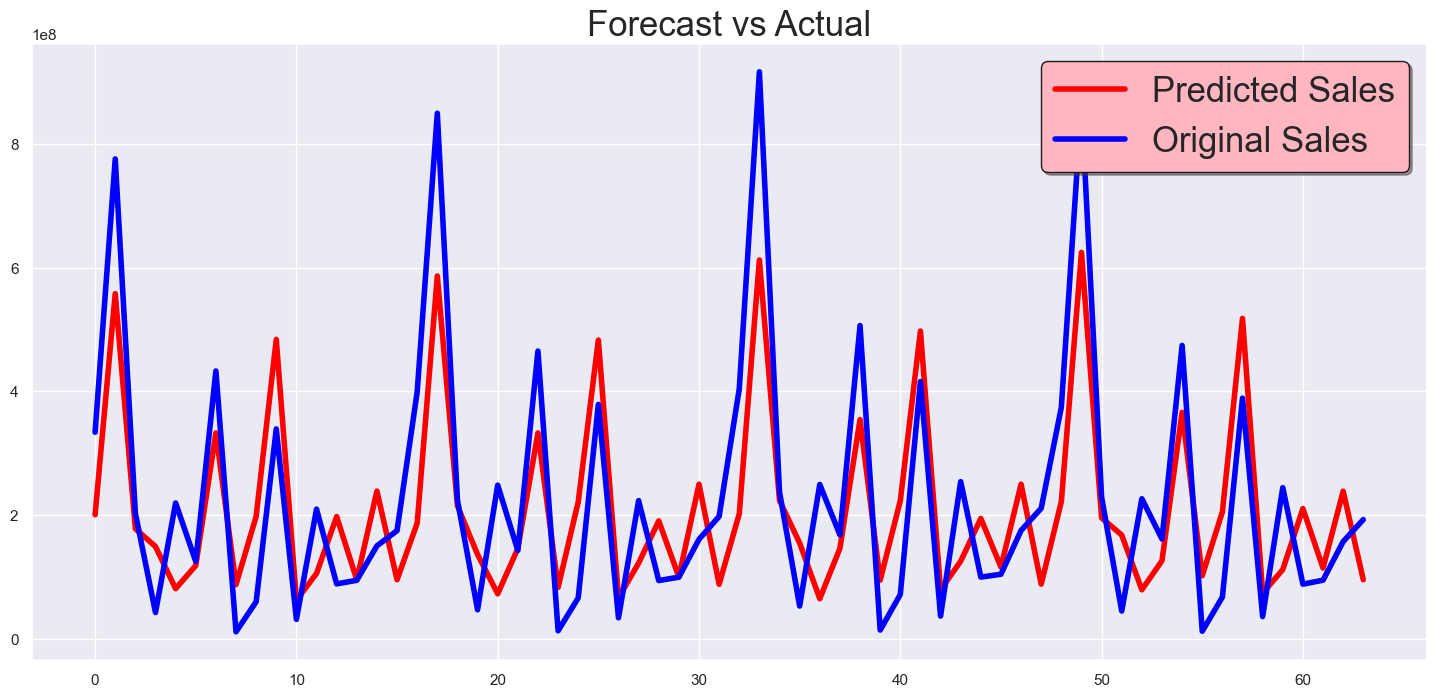

In [14]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(len(test_data)), predictions, label = 'Predicted Sales', linewidth = 4, color = 'red')
plt.plot(range(len(test_data)), test_data['sales'], label = 'Original Sales',color = 'blue', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [92]:
def forecast_next_4_quarters(county):
    '''This code is forecasting the next 4 quarters of motor vehicle sales for a specific county 
    using the SARIMAX model, evaluates the model’s accuracy using RMSE, and visualizes the results 
    with a line plot comparing actual vs. forecasted sales.'''
    
    data = df[df['county'] == county]
    model = sm.tsa.statespace.SARIMAX(data['sales'], order=(2, 0, 2), seasonal_order=(2, 0, 2, 4))
    model_fit = model.fit(disp=False)  # suppress printing model fitting info
    
    # Forecast the next step (since you're using 1-step-ahead forecasting)
    print(model_fit.forecast(steps=4))  # forecast 1 step ahead
    predictions = model_fit.predict(start=data.index[0], end=data.index[-1])
    mse = mean_squared_error(data['sales'], predictions)
    print(f"RMSE for {county}: {np.sqrt(mse)}")
    
    plt.figure(figsize=(8,5))
    sns.lineplot(data['sales'], color = 'green', label='Actual Sales')
    sns.lineplot(model_fit.forecast(steps=4), color = 'red', label='Forecasted Sales')
    plt.title('Actual vs Forecasted Sales Over the Next 4 Quarters')
    plt.xlabel('Time Period (Quarters)')
    plt.ylabel('Sales (in 100 Million$)')
    plt.legend(shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.show()
    

2016-01-01   11846574.94
2016-04-01   12474427.42
2016-07-01   12645343.09
2016-10-01   11576766.25
Freq: QS-OCT, Name: predicted_mean, dtype: float64
RMSE for Fremont: 2140866.287657516


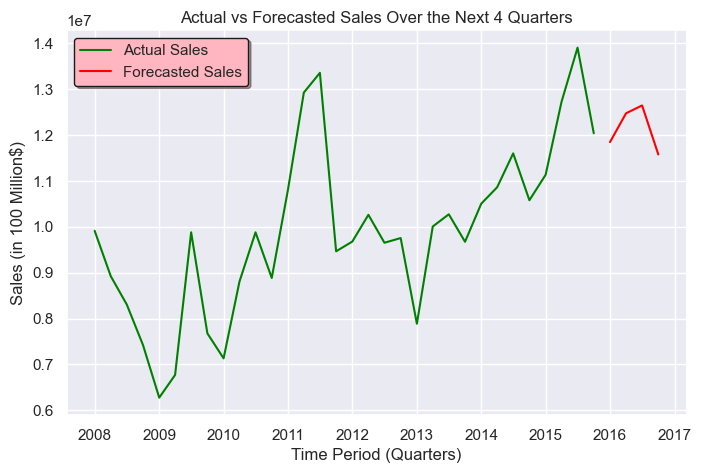

In [98]:
forecast_next_4_quarters('Fremont')